<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b>Mall Customer Segmentation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement 
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

##  Data Definition 

**CustomerID** -  Unique ID assigned to the customer

**Gender** - Gender of the customer

**Age** - Age of the customer

**Annual Income (k$)** - Annual Income of the customee

**Spending Score (1-100)** - Score assigned by the mall based on customer behavior and spending nature

<a id='import_lib'></a>
# 1. Import Libraries

In [96]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [98]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='load_data'></a>
# 2. Read Data

In [135]:
# read excel data file using pandas
df_mall = pd.read_csv('Mall_Customers.csv')

# head() to display top five rows
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [136]:
df_mall.rename(columns = {'Genre':'Gender'}, inplace = True)

<a id='EDA'></a>
# 3. Exploratory Data Analysis

<a id='Understanding_Variables'></a>
## 3.1 Understand the Dataset

In [137]:
df_mall.shape

(200, 5)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> There are 200 observations and 5 columns in the dataset. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='change_datatype'></a>
## 3.2 Data Type 

The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In [138]:
# 'dtypes' gives the datatype for each column
df_mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> All the variables have the data type as per the data definition. Thus, there is no need for type conversion.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dis'></a>
## 3.3 Distribution of Variables

In [139]:
num = df_mall.select_dtypes(include = np.number).columns
cat = df_mall.select_dtypes(exclude = np.number).columns

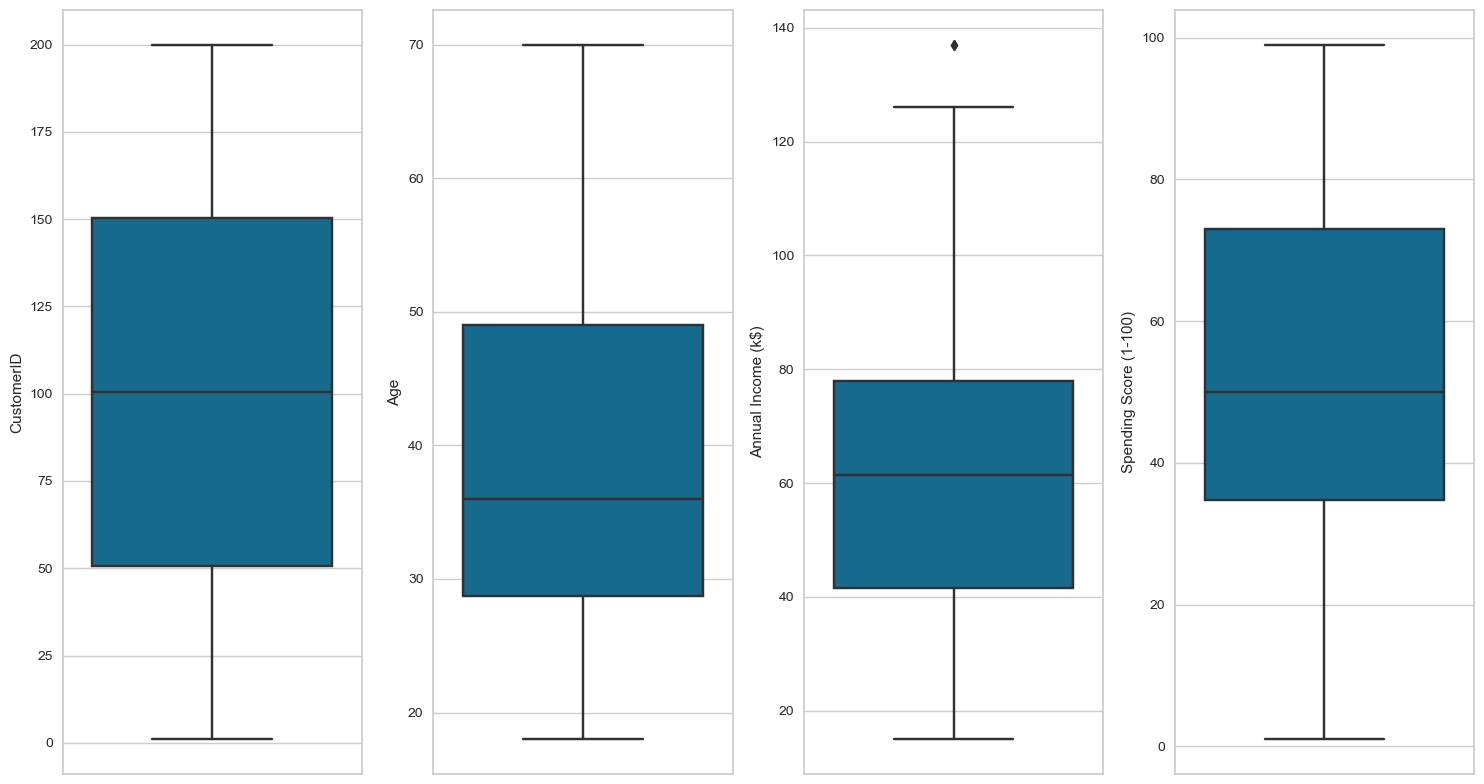

In [140]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(num, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(y = df_mall[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

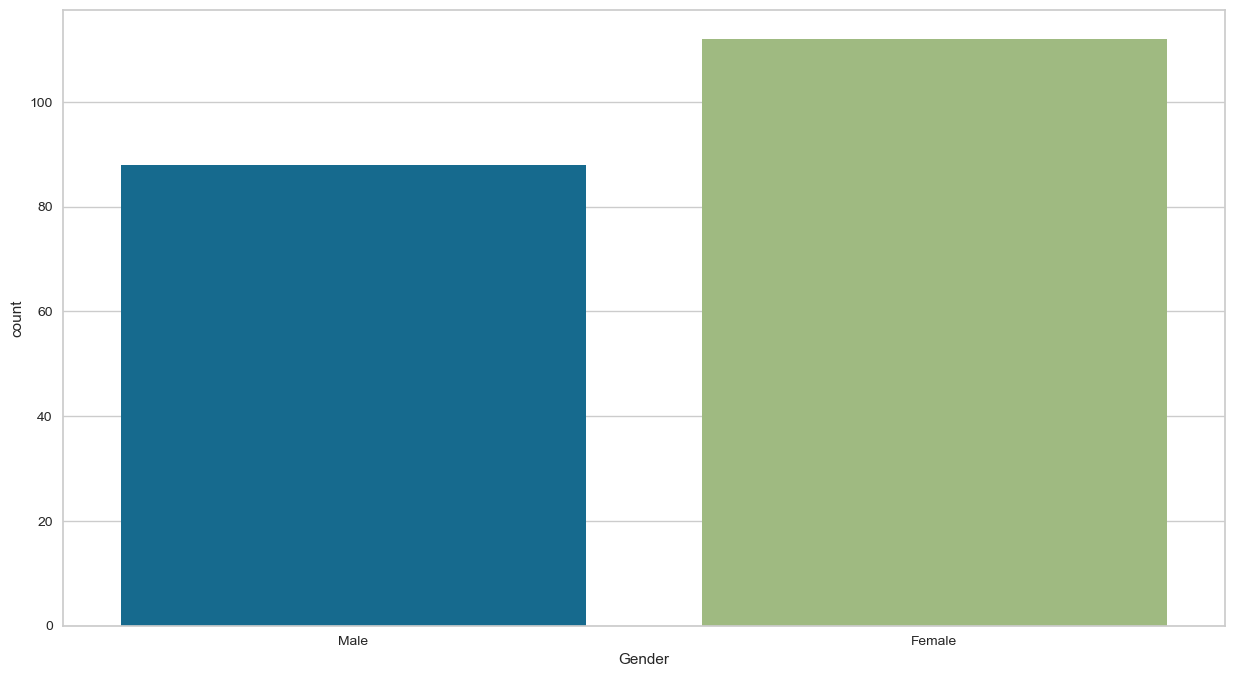

In [141]:
sns.countplot (df_mall.Gender)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above boxplots show that the variable all are normally distributed</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='stat'></a>
## 3.4  Summary Statistics

In [142]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above output illustrates the summary statistics of the numerical variables.<br>
                        The average Annual Income is 60.56. Whereas the Age is 38.85 year old.The spending score is rated from 1 to 100 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='missing_values'></a>
## 3.5 Missing Values

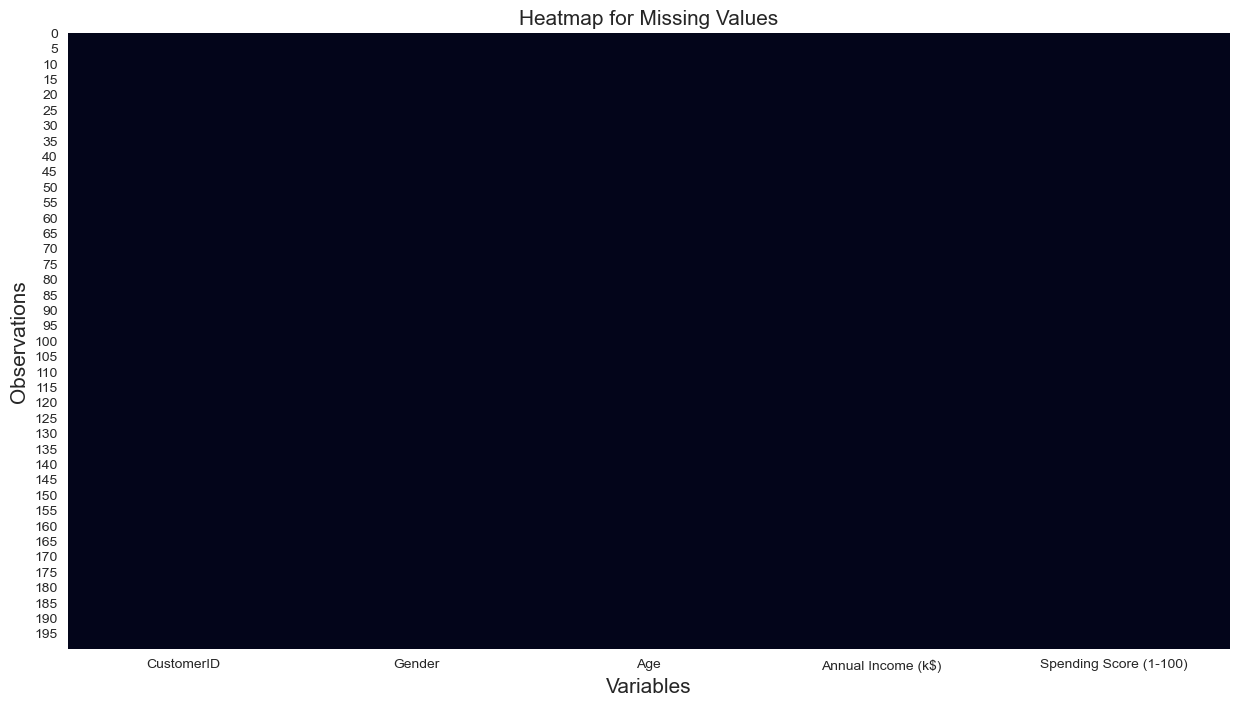

In [143]:
# plot heatmap to check null values
# the 'isnull()' returns the boolean output with value 'True' for the mising entry
# 'cbar = False' does not show the color axis 
sns.heatmap(df_mall.isnull(), cbar=False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that there are no missing values in the data. <br><br> Note: The heatmap represents the missing values with the horizontal non-black colored lines across the observation and the variable that contain missing data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='preparation_of_data'></a>
## 3.6 Prepare the Data

Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result. 

The two most discussed scaling methods are min-max normalization and z-score normalization (aka standardization). 

In [144]:
features = df_mall[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

features_df = pd.DataFrame(features)

print(features_df)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [145]:
features_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [146]:
# skewness along the index axis
features.skew(axis = 0, skipna = True)

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [147]:
# instantiate the 'StandardScaler()'
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data 
features = scaler.fit_transform(features_df)     

# create a dataframe of the scaled features 
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = features_df.columns)
                               
# head() to display top five rows
features_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


<table align="left">
   <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus, we have scaled all the features in the data and stored it in a dataframe 'features_scaled'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='kmeans'></a>
# 4. K-means Clustering

In [148]:
# create several cluster combinations ranging from 1 to 7 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(2,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

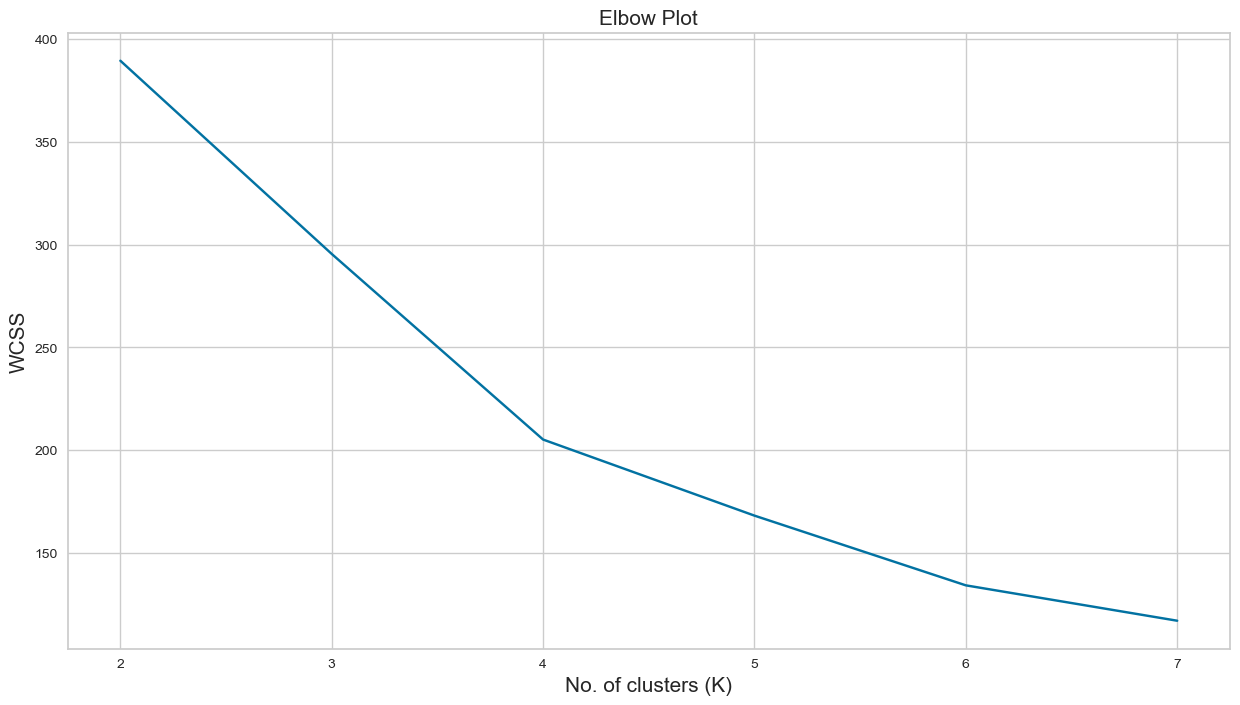

In [149]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(2,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [150]:
# import the 'KneeLocator' 
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction' 
k = KneeLocator(x  = range(2,8), y = wcss, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature 
k.elbow

4

In [151]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7,8]

# use 'for' loop to build the clusters with different K
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # pass the scaled data and predicted labels to the 'silhouette_score()'
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.33547192894004574)
For n_clusters = 3, silhouette score is 0.3579234303882264)
For n_clusters = 4, silhouette score is 0.4039582785148566)
For n_clusters = 5, silhouette score is 0.41664341513732767)
For n_clusters = 6, silhouette score is 0.43106526216603014)
For n_clusters = 7, silhouette score is 0.4202943972835935)
For n_clusters = 8, silhouette score is 0.40778775163803344)


<table align="left">
    <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The optimum value for K is associated with the highest value of the silhouette score. Since the cluster for all above 4 are similar , K = 4.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='kmodel'></a>
## 4.2 Build the Model

In [152]:
# build a K-Means model for K = 6
# pass the 'random_state' to obtain the same centroid initialization for each code run
K_model = KMeans(n_clusters= 6, random_state= 10)

# fit the model on the scaled data
K_model.fit(features_scaled)

KMeans(n_clusters=6, random_state=10)

In [153]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
df_mall['Kmeans_label'] = K_model.labels_

# use the 'head()' to display top five rows
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [154]:
# the 'unique()' returns the number of distinct clusters
# the 'return_counts = True' gives the number observation in each cluster
np.unique(K_model.labels_, return_counts=True)                

(array([0, 1, 2, 3, 4, 5]), array([40, 25, 45, 39, 21, 30], dtype=int64))

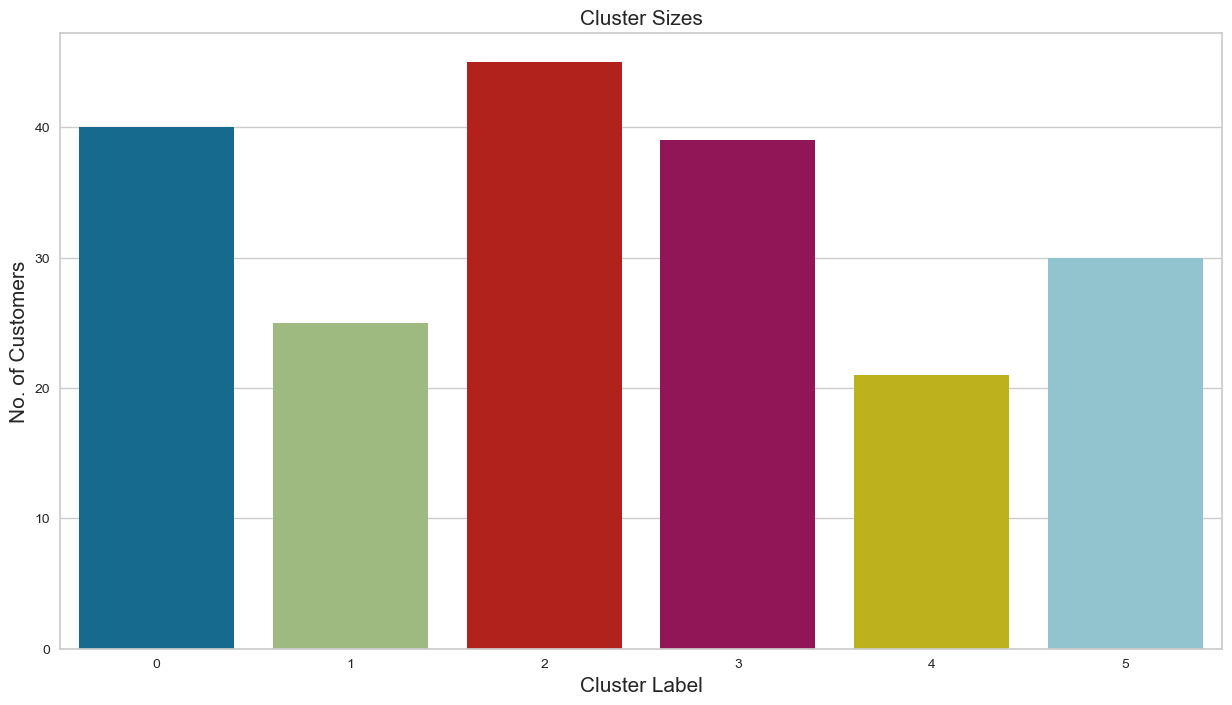

In [155]:
sns.countplot(data= df_mall, x = 'Kmeans_label')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# display the plot
plt.show()

<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The largest cluster is the one containing 60 above customers.</b>
              </font>
            </div>
        </td>
    </tr>
</table>

In [156]:
# form a dataframe containing cluster centers
# the 'cluster_centers_' returns the co-ordinates of the center of each cluster 
centers = pd.DataFrame(K_model.cluster_centers_, columns =  (df_mall.drop(['Kmeans_label','Gender','CustomerID'], axis=1)).columns)      

# display the cluster centers
centers

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.913231,-0.043322,-0.223224
1,-0.953779,-1.300814,1.010913
2,1.254721,-0.240213,-0.043998
3,-0.441917,0.991583,1.239503
4,0.478957,-1.308230,-1.196444
5,0.369598,1.128797,-1.252642


In [157]:
# the 'scaler' is the standard scaler fitted on the original data
# use 'inverse_transform()' to get the cluster centers for the original (unscaled) data
# pass the scaled cluster centers to apply inverse transformation
# create a dataframe of these cluster centers
# pass the required column names to the parameter, 'columns'
unscaled_centers = pd.DataFrame(scaler.inverse_transform(K_model.cluster_centers_), 
                                columns =  (df_mall.drop(['Kmeans_label','Gender','CustomerID'], axis=1)).columns)      

# display the dataframe
unscaled_centers

,Age,Annual Income (k$),Spending Score (1-100)
0,26.125000,59.425000,44.450000
1,25.560000,26.480000,76.240000
2,56.333333,54.266667,49.066667
3,32.692308,86.538462,82.128205
4,45.523810,26.285714,19.380952
5,44.000000,90.133333,17.933333


<a id='clusters'></a>
## 4.3 Analyze the Clusters

In [158]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Kmeans_label == 0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label
count,40.000000,40.00000,40.000000,40.000000,40.0
mean,97.700000,26.12500,59.425000,44.450000,0.0
std,29.178672,7.03175,10.587577,14.279176,0.0
min,48.000000,18.00000,40.000000,5.000000,0.0
25%,77.500000,19.75000,54.000000,41.000000,0.0
50%,97.000000,25.00000,60.000000,48.000000,0.0
75%,117.250000,31.00000,65.500000,54.250000,0.0
max,163.000000,40.00000,81.000000,60.000000,0.0


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>**Impulse buyers** - There are 40 customers in this cluster, which makes this the second largest cluster.These customers are typically looking for something to buy on a whim. <br> This customers average income and Spending score are 59k and 44 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Kmeans_label == 1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label
count,25.000000,25.000000,25.000000,25.000000,25.0
mean,24.200000,25.560000,26.480000,76.240000,1.0
std,14.944341,5.439669,8.525061,13.562448,0.0
min,1.000000,18.000000,15.000000,39.000000,1.0
25%,12.000000,21.000000,19.000000,72.000000,1.0
50%,24.000000,24.000000,25.000000,76.000000,1.0
75%,36.000000,30.000000,33.000000,82.000000,1.0
max,52.000000,35.000000,42.000000,99.000000,1.0


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>**Specialty shoppers** - There are 25 customers in this cluster. These customers are looking for specific items, such as clothes, shoes, or electronics. <br> This customers average income and Spending score are 26k and 76 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Kmeans_label == 2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label
count,45.000000,45.000000,45.000000,45.000000,45.0
mean,83.777778,56.333333,54.266667,49.066667,2.0
std,24.911561,8.453079,8.975725,6.300794,0.0
min,41.000000,43.000000,38.000000,35.000000,2.0
25%,64.000000,49.000000,47.000000,45.000000,2.0
50%,81.000000,54.000000,54.000000,49.000000,2.0
75%,103.000000,65.000000,62.000000,55.000000,2.0
max,161.000000,70.000000,79.000000,60.000000,2.0


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Budget shoppers** - There are 45 customers in this cluster, which makes this the largest cluster. Here the customer are looking for the best deals possible. <br> This customers average income and Spending score are 54k and 49.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [175]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Kmeans_label == 3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000
mean,162.000000,32.692308,86.538462,82.128205,3.0,2.0,-0.025641
std,22.803509,3.728650,16.312485,9.364489,0.0,0.0,0.160128
min,124.000000,27.000000,69.000000,63.000000,3.0,2.0,-1.000000
25%,143.000000,30.000000,75.500000,74.500000,3.0,2.0,0.000000
50%,162.000000,32.000000,79.000000,83.000000,3.0,2.0,0.000000
75%,181.000000,35.500000,95.000000,90.000000,3.0,2.0,0.000000
max,200.000000,40.000000,137.000000,97.000000,3.0,2.0,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Brand-name shoppers** - There are 39 customers in this cluster, which makes this the third largest cluster. Here the customer are loyal to certain brands and are willing to pay a premium for them. <br> This customers average income and Spending score are 86k and 82.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [177]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Kmeans_label == 4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.000000
mean,23.190476,45.523810,26.285714,19.380952,4.0,4.0,-0.095238
std,12.726425,11.766984,7.437357,12.555780,0.0,0.0,0.300793
min,3.000000,20.000000,16.000000,3.000000,4.0,4.0,-1.000000
25%,13.000000,36.000000,20.000000,6.000000,4.0,4.0,0.000000
50%,23.000000,46.000000,25.000000,15.000000,4.0,4.0,0.000000
75%,33.000000,53.000000,33.000000,31.000000,4.0,4.0,0.000000
max,45.000000,67.000000,39.000000,40.000000,4.0,4.0,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Passerby shoppers** -There are 21 customers in this cluster. These customers are not specifically planning to go to the mall and are not necessarily looking to buy anything. <br> This customers average income and Spending score are 26k and 19.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [176]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Kmeans_label == 5].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,167.066667,44.000000,90.133333,17.933333,5.0,2.866667,-0.100000
std,21.486055,8.081482,16.919145,9.888807,0.0,0.507416,0.305129
min,127.000000,32.000000,71.000000,1.000000,5.0,1.000000,-1.000000
25%,151.500000,37.000000,78.000000,11.500000,5.0,3.000000,0.000000
50%,170.000000,43.500000,87.000000,16.500000,5.0,3.000000,0.000000
75%,184.500000,47.750000,98.750000,23.750000,5.0,3.000000,0.000000
max,199.000000,59.000000,137.000000,39.000000,5.0,3.000000,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Window shoppers** -There are 30 customers in this cluster.  These customers are not necessarily looking to buy anything either. <br> This customers average income and Spending score are 90k and 17.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='hie'></a>
# 5. Hierarchical Clustering

In [54]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[ 65.          68.           0.07176669   2.        ]
 [129.         131.           0.07176669   2.        ]
 [106.         109.           0.07764312   2.        ]
 [  3.           5.           0.09008039   2.        ]
 [ 92.          96.           0.10573037   2.        ]
 [114.         115.           0.10573037   2.        ]
 [133.         137.           0.11240915   2.        ]
 [ 16.          20.           0.11450829   2.        ]
 [ 60.          70.           0.12091014   2.        ]
 [117.         119.           0.1304091    2.        ]]


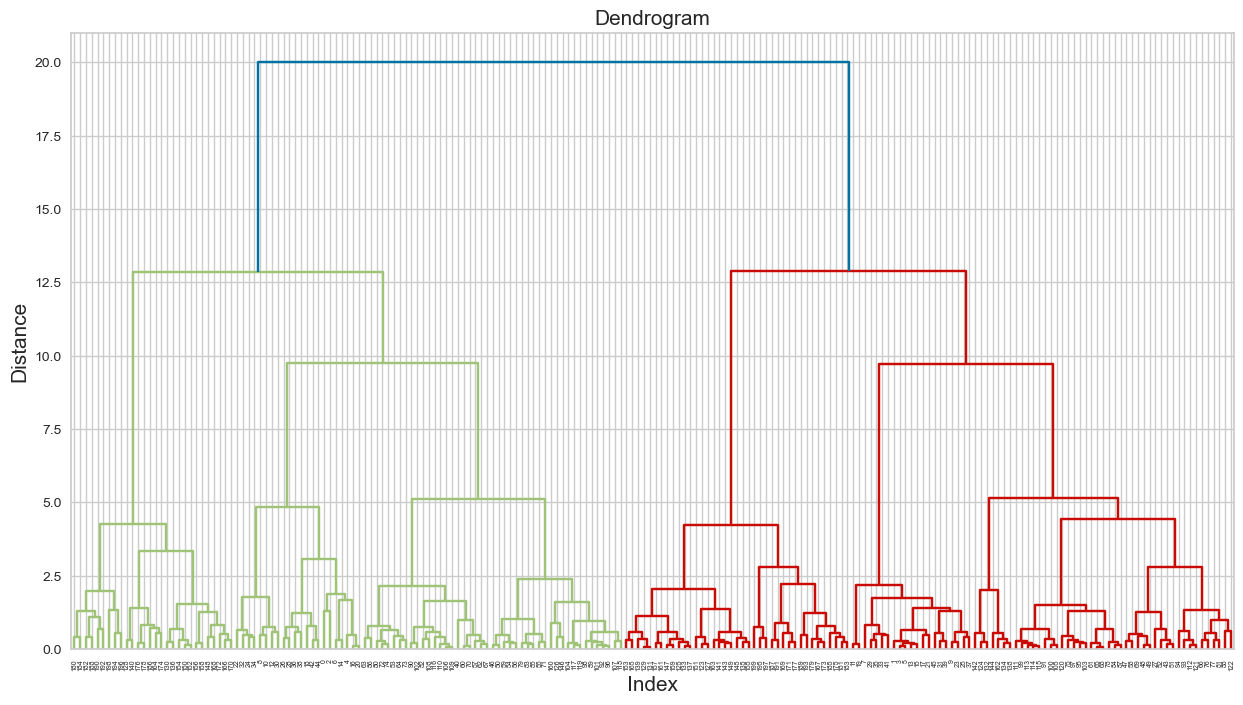

In [55]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 60
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 60:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

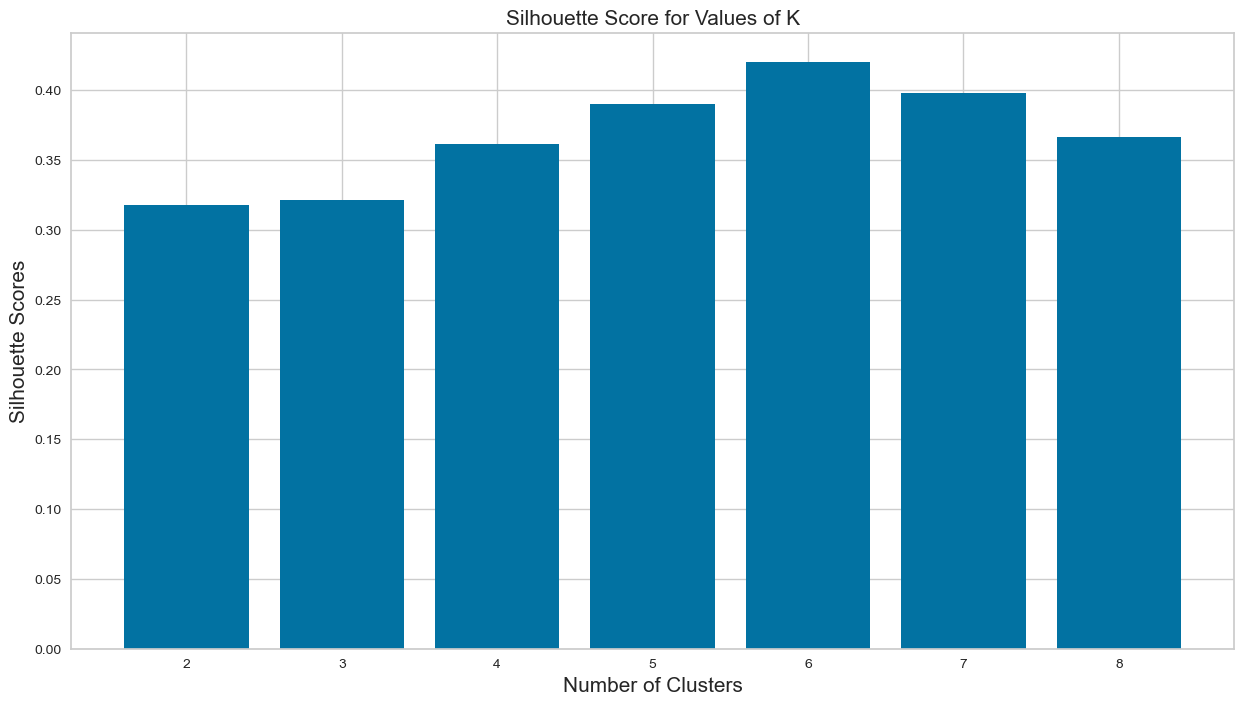

In [178]:
# consider different values of K
K = [2, 3, 4, 5, 6,7,8]

# consider an empty list tot store the silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    # use the 'ward' linkage method (same as the dendrogram)
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    
    # calculate the silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled))) 
    
# plot the silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

<a id='hie_model'></a>
## 5.2 Build the Model

In [162]:
# instantiate clustering method with 3 clusters and 'ward' linkage method
hierar_clusters = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')

# fit the model on the scaled data
hierar_clusters.fit(features_scaled)

AgglomerativeClustering(n_clusters=6)

In [163]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_mall['Hierar_label'] = hierar_clusters.labels_

# print head() of the dataframe
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,5
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,1,5
4,5,Female,31,17,40,4,4


In [164]:
# use the 'value_counts()' to get the number of houses in each cluster
df_mall['Hierar_label'].value_counts()

0    45
1    45
2    39
3    28
4    22
5    21
Name: Hierar_label, dtype: int64

<a id='retrieve_clusters'></a>
## 5.3 Analyze the Clusters

In [165]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Hierar_label == 0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label
count,45.00000,45.000000,45.000000,45.000000,45.000000,45.0
mean,92.80000,27.377778,57.511111,45.844444,0.155556,0.0
std,31.37935,7.758540,11.750478,14.108275,0.474608,0.0
min,28.00000,18.000000,28.000000,5.000000,0.000000,0.0
25%,69.00000,20.000000,48.000000,42.000000,0.000000,0.0
50%,94.00000,26.000000,60.000000,50.000000,0.000000,0.0
75%,115.00000,32.000000,65.000000,55.000000,0.000000,0.0
max,163.00000,45.000000,81.000000,61.000000,2.000000,0.0


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>**Impulse buyers** - There are 45 customers in this cluster, which makes this the second largest cluster.These customers are typically looking for something to buy on a whim. <br> This customers average income and Spending score are 58k and 46 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [179]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Hierar_label == 1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.0
mean,86.666667,56.400000,55.288889,48.355556,2.133333,1.0,0.0
std,27.164482,8.373117,9.834129,6.869417,0.625227,0.0,0.0
min,41.000000,43.000000,38.000000,35.000000,2.000000,1.0,0.0
25%,64.000000,49.000000,47.000000,43.000000,2.000000,1.0,0.0
50%,84.000000,54.000000,54.000000,48.000000,2.000000,1.0,0.0
75%,107.000000,65.000000,63.000000,55.000000,2.000000,1.0,0.0
max,161.000000,70.000000,79.000000,60.000000,5.000000,1.0,0.0


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Budget shoppers** - There are 45 customers in this cluster, which makes this the largest cluster. Here the customer are looking for the best deals possible.The age group falls under 18 to 45 <br> This customers average income and Spending score are 57k and 45.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [180]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Hierar_label == 2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000
mean,162.000000,32.692308,86.538462,82.128205,3.0,2.0,-0.025641
std,22.803509,3.728650,16.312485,9.364489,0.0,0.0,0.160128
min,124.000000,27.000000,69.000000,63.000000,3.0,2.0,-1.000000
25%,143.000000,30.000000,75.500000,74.500000,3.0,2.0,0.000000
50%,162.000000,32.000000,79.000000,83.000000,3.0,2.0,0.000000
75%,181.000000,35.500000,95.000000,90.000000,3.0,2.0,0.000000
max,200.000000,40.000000,137.000000,97.000000,3.0,2.0,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Brand-name shoppers** - There are 39 customers in this cluster. Here the customer are loyal to certain brands and are willing to pay a premium for them. <br> This customers average income and Spending score are 86k and 82.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [181]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Hierar_label == 3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.000000
mean,169.214286,43.892857,91.285714,16.678571,5.0,3.0,-0.107143
std,20.413063,8.337063,16.915601,8.973432,0.0,0.0,0.314970
min,129.000000,32.000000,71.000000,1.000000,5.0,3.0,-1.000000
25%,154.500000,36.750000,78.000000,10.750000,5.0,3.0,0.000000
50%,172.000000,43.500000,87.000000,16.000000,5.0,3.0,0.000000
75%,185.500000,47.750000,99.500000,22.250000,5.0,3.0,0.000000
max,199.000000,59.000000,137.000000,39.000000,5.0,3.0,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Passerby shoppers** -There are 28 customers in this cluster. These customers are not specifically planning to go to the mall and are not necessarily looking to buy anything. <br> This customers average income and Spending score are 91k and 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [182]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Hierar_label == 4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000
mean,22.181818,44.318182,25.772727,20.272727,3.863636,4.0,-0.136364
std,13.290299,12.800247,7.646548,12.947446,0.639602,0.0,0.351250
min,1.000000,19.000000,15.000000,3.000000,1.000000,4.0,-1.000000
25%,11.500000,35.250000,19.250000,7.750000,4.000000,4.0,0.000000
50%,22.000000,45.500000,24.500000,16.000000,4.000000,4.0,0.000000
75%,32.500000,52.750000,32.250000,31.750000,4.000000,4.0,0.000000
max,45.000000,67.000000,39.000000,40.000000,4.000000,4.0,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> **Window shoppers** -There are 22 customers in this cluster.  These customers are not necessarily looking to buy anything either. <br> This customers average income and Spending score are 26k and 20.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [183]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_mall[df_mall.Hierar_label == 5].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
count,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.000000
mean,22.857143,24.809524,25.619048,80.238095,1.0,5.0,-0.095238
std,13.424924,4.905294,7.736124,9.909111,0.0,0.0,0.300793
min,2.000000,18.000000,15.000000,65.000000,1.0,5.0,-1.000000
25%,12.000000,21.000000,19.000000,73.000000,1.0,5.0,0.000000
50%,22.000000,23.000000,24.000000,77.000000,1.0,5.0,0.000000
75%,34.000000,29.000000,33.000000,87.000000,1.0,5.0,0.000000
max,46.000000,35.000000,39.000000,99.000000,1.0,5.0,0.000000


<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>**Specialty shoppers** - There are 21 customers in this cluster. These customers are looking for specific items, such as clothes, shoes, or electronics. <br> This customers average income and Spending score are 26k and 80 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dbscan'></a>
# 6. DBSCAN

<a id='model'></a>
## 6.1 Build the Model

In [166]:
# consider the array of euclidean distnce between the scaled data points
# the 'euclidean_distances()' returns the distance matrix which is symmetric
# consider only the upper-triangular elements, 'k=1' drops the diagonal elements
dist_array = euclidean_distances(features_scaled)[np.triu_indices(200, k = 1)]

# calculate the minimum euclidean distance between the data points 
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points 
print('Maximum Distance:', dist_array.max())

Minimum Distance: 0.07176668967516826
Maximum Distance: 5.990442868768087


In [167]:
# instantiate DBSCAN with epsilon and minimum points 
# pass the epsilon value as 1.4
# pass the number of minimum points as 4
dbscan_model = DBSCAN(eps = 0.7, min_samples = 4)

# fit the model on the scaled data
dbscan_model.fit(features_scaled)

DBSCAN(eps=0.7, min_samples=4)

In [168]:
# display the labels of unique clusters formed by DBSCAN
(set(dbscan_model.labels_))

{-1, 0, 1}

In [169]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_mall['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
0,1,Male,19,15,39,1,4,-1
1,2,Male,21,15,81,1,5,0
2,3,Female,20,16,6,4,4,-1
3,4,Female,23,16,77,1,5,0
4,5,Female,31,17,40,4,4,0


In [170]:
# use the 'value_counts()' to get the number of houses in each cluster
df_mall['DBSCSAN_label'].value_counts()

 0    187
-1      9
 1      4
Name: DBSCSAN_label, dtype: int64

<table align="left">
   <tr>
        <td width="8%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Model underperforms</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='visual'></a>
# 7. Visualize the Clusters

In [171]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


In [172]:
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans_label,Hierar_label,DBSCSAN_label
0,1,Male,19,15,39,1,4,-1
1,2,Male,21,15,81,1,5,0
2,3,Female,20,16,6,4,4,-1
3,4,Female,23,16,77,1,5,0
4,5,Female,31,17,40,4,4,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,2,0
196,197,Female,45,126,28,5,3,-1
197,198,Male,32,126,74,3,2,0
198,199,Male,32,137,18,5,3,-1


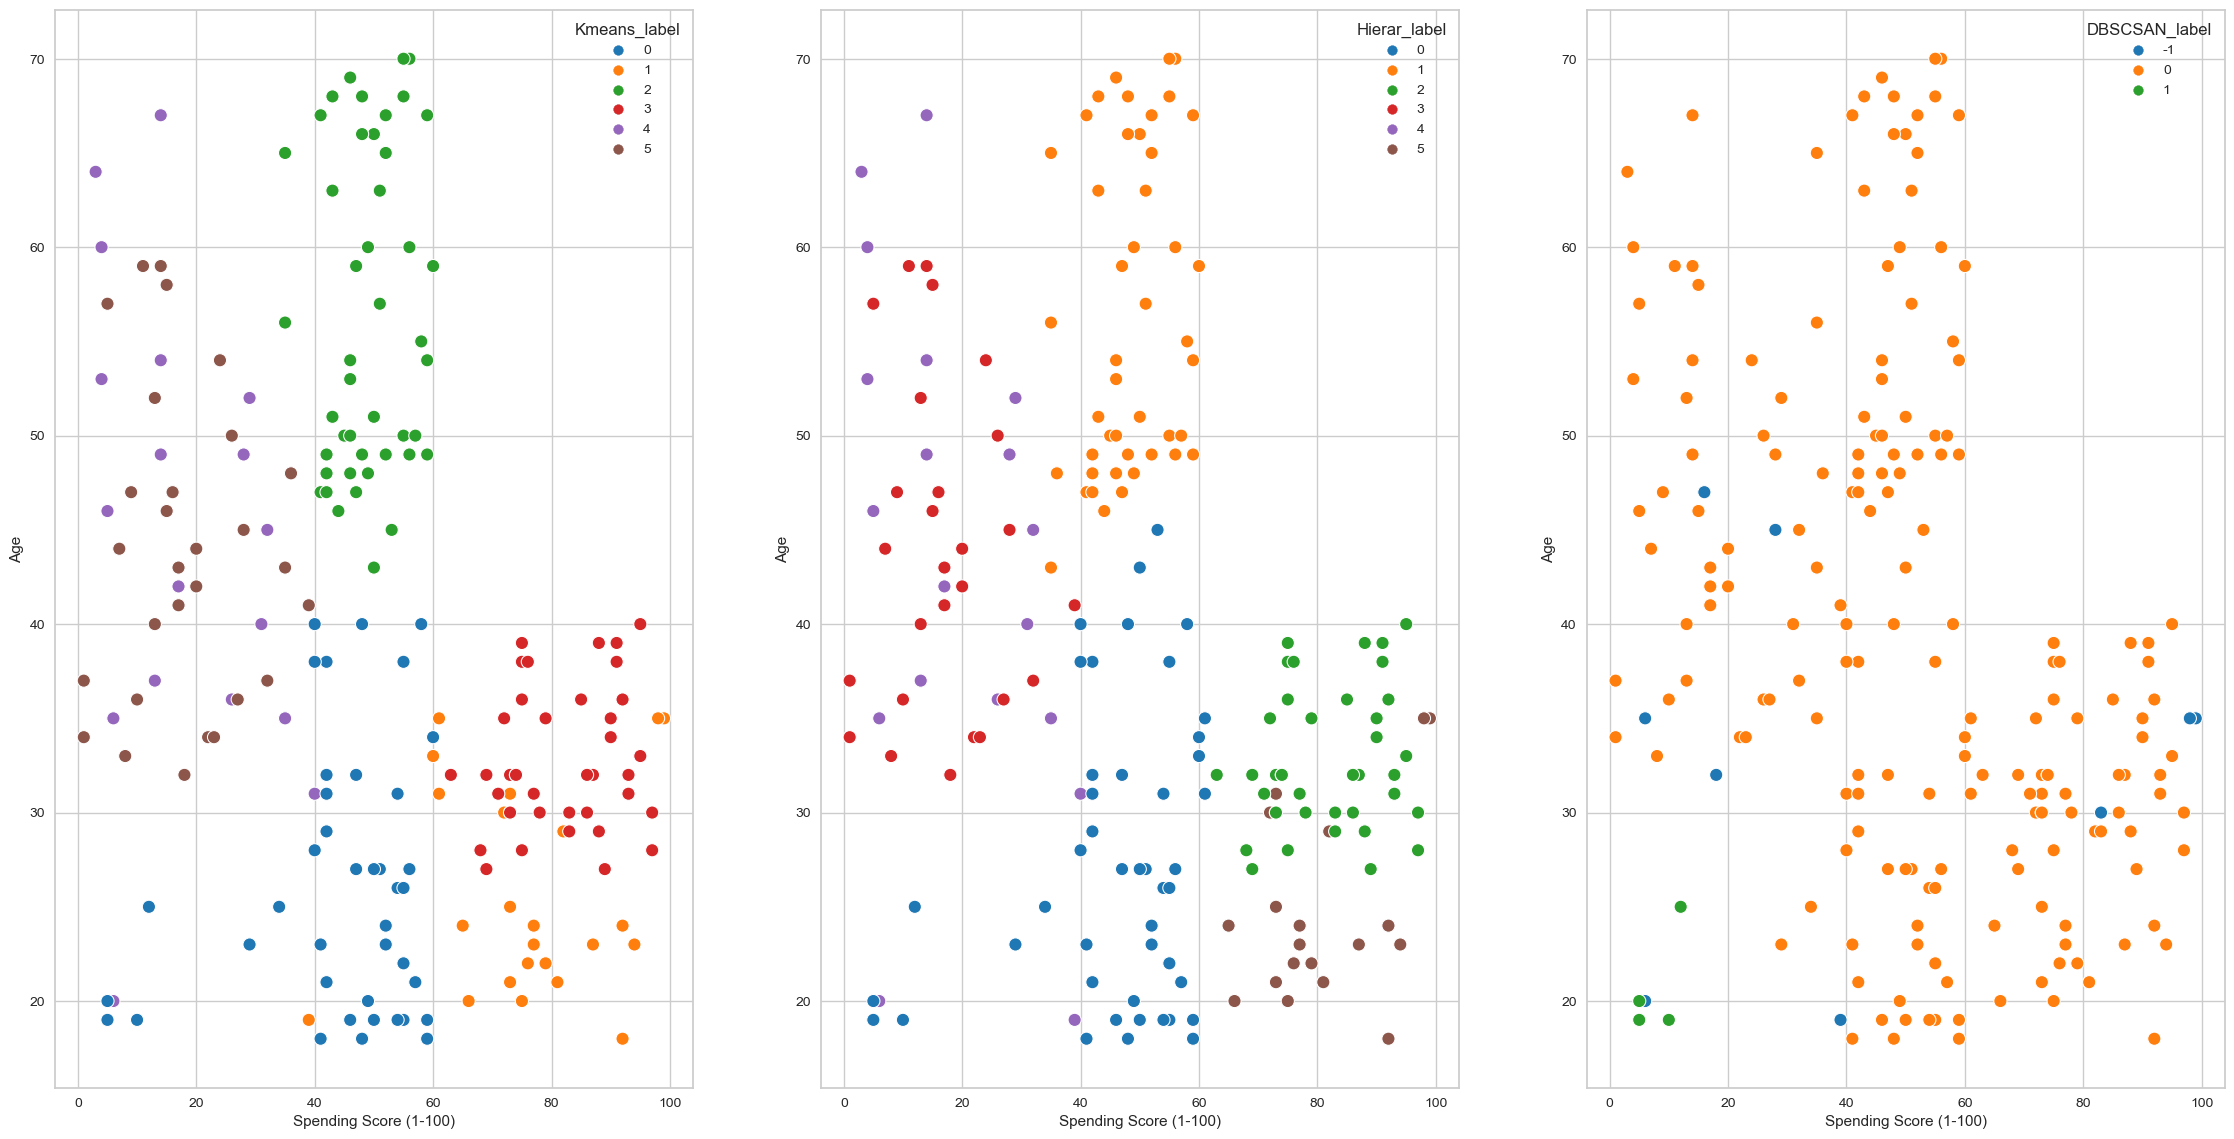

In [174]:
# set the plot size
plt.figure(figsize = (28, 14))

# plot a scatterplot to visualize the clusters
# pass the 1st and 2nd principal component to the parameter 'x' and 'y' respectively
# pass the dataframe of PCA components to the parameter 'data'
# pass the size of the data points to the parameter 's'
# pass the cluster labels to the parameter 'hue' to display the clusters with different colors
# pass the required colors to the parameter 'palette'

# plot the first subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,1)
sns.scatterplot(y = 'Age', x = 'Spending Score (1-100)', data = df_mall,  s = 90, hue = df_mall['Kmeans_label'], palette = 'tab10')

# plot the second subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,2)
sns.scatterplot(y = 'Age', x = 'Spending Score (1-100)', data = df_mall,  s = 90, hue = df_mall['Hierar_label'], palette = 'tab10')

# plot the third subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,3)
sns.scatterplot(y = 'Age', x = 'Spending Score (1-100)', data = df_mall,  s = 90, hue = df_mall['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()

**Impulse buyers**: These customers are typically looking for something to buy on a whim. They are often attracted to stores that have bright displays and eye-catching merchandise.

**Budget shoppers**: These customers are looking for the best deals possible. They are often drawn to stores that offer coupons, discounts, and sales.

**Brand-name shoppers**: These customers are loyal to certain brands and are willing to pay a premium for them. They are often attracted to stores that carry the brands they love.

**Specialty shoppers**: These customers are looking for specific items, such as clothes, shoes, or electronics. They are often drawn to stores that specialize in these items.

**Window shoppers**: These customers are not necessarily looking to buy anything. They are simply browsing the stores and looking at the merchandise.

**Passerby shoppers**: These customers are not specifically planning to go to the mall. They are simply passing by and decide to stop in.

<a id='conclusion'></a>
# 7. Conclusion

### Strategy plan
**1. Use social media to connect with customers and promote your mall.**

• Create a presence on the most popular social media platforms, such as Facebook, Twitter, and Instagram.

• Post interesting and engaging content that will appeal to your target audience.

• Run contests and giveaways to attract attention.

• Respond to comments and questions from customers in a timely manner.

**2. Offer promotions and discounts to attract customers and encourage them to spend money.**

• Create special offers for first-time visitors or members of your loyalty program.

• Offer discounts on specific items or during certain times of the day.

• Run promotions in conjunction with events or holidays.

**3. Host events and activities to create excitement and foot traffic in your mall.**

• Hold concerts, fashion shows, or other events that will draw people to your mall.

• Offer free samples or demonstrations of products or services.

• Create a kids' play area or other family-friendly activities.

**4. Partner with other businesses to reach a wider audience and attract new customers.**

• Team up with a movie theater, restaurant, or other businesses that complement your own.

• Offer joint promotions or discounts.

• Cross-promote each other's businesses on social media.

**5. Provide excellent customer service to ensure that customers have a positive experience.**

• Be friendly and helpful to all customers.

• Go the extra mile to resolve any problems or complaints.

• Make sure customers feel valued and appreciated.